In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
from datetime import date, datetime
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_theme()
sns.set_color_codes()
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 50)

# column_names = ['# Seen', 'ALSA', '# Picked', 'ATA', '# GP', 'GP WR', '# OH', 'OH WR', '# GD', 'GD WR', '# GIH', 'GIH WR', '# GND', 'GND WR', 'IWD', 'Color', 'Rarity']

from Utilities import Logger
import WUBRG
from data_graphing.LineColors import LineColors
from game_metadata import SETS, FORMATS
from game_metadata import Card,CardManager, SetMetadata, FormatMetadata
from data_fetching import JSONHandler, RawDataFetcher, RawDataHandler, FramedData, SetManager

LOG_LEVEL = Logger.FLG.DEFAULT
LOG_LEVEL

<Flags.DEFAULT: 3>

# Initialization

In [3]:
set_data = SetManager('NEO')
len(set_data.SET_METADATA.CARD_LIST)

Fetching card data for set: NEO
Fetching data for set: NEO


287

In [4]:
set_data.check_for_updates()

Checking for missing data for NEO PremierDraft...
Getting overall data for NEO PremierDraft
Getting data for NEO PremierDraft, date: 2022-02-10
Getting data for NEO PremierDraft, date: 2022-02-11
Getting data for NEO PremierDraft, date: 2022-02-12
Getting data for NEO PremierDraft, date: 2022-02-13
Getting data for NEO PremierDraft, date: 2022-02-14
Getting data for NEO PremierDraft, date: 2022-02-15
Getting data for NEO PremierDraft, date: 2022-02-16
Getting data for NEO PremierDraft, date: 2022-02-17
Getting data for NEO PremierDraft, date: 2022-02-18
Getting data for NEO PremierDraft, date: 2022-02-19
Getting data for NEO PremierDraft, date: 2022-02-20
Getting data for NEO PremierDraft, date: 2022-02-21
Getting data for NEO PremierDraft, date: 2022-02-22
Getting data for NEO PremierDraft, date: 2022-02-23
Getting data for NEO PremierDraft, date: 2022-02-24
Getting data for NEO PremierDraft, date: 2022-02-25
Getting data for NEO PremierDraft, date: 2022-02-26
Getting data for NEO Pre

Getting data for NEO QuickDraft, date: 2022-04-06
Getting data for NEO QuickDraft, date: 2022-04-07
Getting data for NEO QuickDraft, date: 2022-04-08
Finished checking for missing data for NEO QuickDraft.



# Objects

In [6]:
import sys
try:
    del sys.modules["data_graphing"] 
    del data_graphing
except:
    pass

from data_graphing import ColorHandler, PlotterHelper

In [32]:
class FramedDataFuncs:   
    def __init__(self, DATA):
        self._DATA = DATA
        self._ARCH_FUNCS = ArchFuncs(self._DATA)
        self._SNGL_CARD_FUNCS = SingleCardFuncs(self._DATA)
    
    @property
    def SET(self):
        """The draft set."""
        return self._DATA.SET
    
    @property
    def FULL_SET(self):
        """The full name of the draft set."""
        return self._DATA.FULL_SET
    
    @property
    def FORMAT(self):
        """The format type."""
        return self._DATA.FORMAT
    
    @property
    def SHORT_FORMAT(self):
        """The shorthand of the format type."""
        return self._DATA.FULL_FORMAT
    
    @property
    def DATA(self):
        """The object which contains the data about the set and format."""
        return self._DATA
        
    def check_for_updates(self):
        """Populates and updates all data properties, filling in missing data."""
        self._DATA.check_for_updates()

    def reload_data(self):
        """Populates and updates all data properties, reloading all data."""
        self._DATA.reload_data()  
    
    def deck_group_frame(self, name=None, date=None, summary=False):
        """Returns a subset of the 'GROUPED_ARCHETYPE' data as a DataFrame."""
        return self.DATA.deck_group_frame(name, date, summary)
     
    def deck_archetype_frame(self, deck_color=None, date=None, summary=False):
        """Returns a subset of the 'SINGLE_ARCHETYPE' data as a DataFrame."""
        return self.DATA.deck_archetype_frame(deck_color, date, summary)
    
    def card_frame(self, name=None, deck_color=None, date=None, card_color=None, card_rarity=None, summary=False):
        """Returns a subset of the 'CARD' data as a DataFrame."""
        return self.DATA.card_frame(name, deck_color, date, card_color, card_rarity, summary)
    
    def compress_date_range_data(self, start_date, end_date, card_name=None):
        """Summarizes card data over a provided set of time."""
        return self.DATA.compress_date_range_data(start_date, end_date, card_name)
        
    
    #ArchFuncs
    def get_games_played(self, deck_color):
        return self._ARCH_FUNCS.get_games_played(deck_color)
        
    def get_avg_winrate(self, day=None, arch='All Decks'):
        return self._ARCH_FUNCS.get_avg_winrate(day, arch)
    
    def get_archetype_frame(self, colors, roll=None):
        return self._ARCH_FUNCS.get_archetype_frame(colors, roll)

    def get_archetype_winrate_history(self, color_filter=None, roll=None):
        return self._ARCH_FUNCS.get_archetype_winrate_history(color_filter, roll)

    def plot_archetype_winrate_history(self, color_filter=None, roll=None):
        return self._ARCH_FUNCS.plot_archetype_winrate_history(color_filter, roll)       
        
    def get_archetype_playrate_history(self, color_filter=None, roll=None):
        return self._ARCH_FUNCS.get_archetype_playrate_history(color_filter, roll)

    def plot_archetype_playrate_history(self, color_filter=None, roll=None):
        return self._ARCH_FUNCS.plot_archetype_playrate_history(color_filter, roll)
    
    
    #SingleCardFuncs
    def get_card_summary(self, card_name, colors='', roll=None):
        return self._SNGL_CARD_FUNCS.get_card_summary(card_name, colors, roll)

    def plot_card_summary(self, card_name, colors='', roll=None):
        return self._SNGL_CARD_FUNCS.plot_card_summary(card_name, colors, roll)
    
    def get_pick_stats(self, card_name, roll=None):
        return self._SNGL_CARD_FUNCS.get_pick_stats(card_name, roll)
    
    def plot_pick_stats(self, card_name, roll=None):
        return self._SNGL_CARD_FUNCS.plot_pick_stats(card_name, roll)
    
    def card_archetype_performance(self, card_name):
        return self._SNGL_CARD_FUNCS.card_archetype_performance(card_name)
    
    def stat_archetype_performance(self, stat_name, color_cols=None, min_colors=0, max_colors=5):
        return self._SNGL_CARD_FUNCS.stat_archetype_performance(stat_name, color_cols, min_colors, max_colors)

##    # filters = ['exact', 'subset', 'contains', 'adjascent'*]
##    ## TODO: Determine how to handle colourless cards.
##    ## 'exact': 'U' --> 'U'
##    ## 'subset': 'UW' --> 'U', 'W', 'WU'
##    ## 'contains': 'U' --> 'U', 'UW', 'UB', 'UR', 'UG'...
##    ## 'contains': 'UW' --> 'UW', 'UBW', 'URW', 'UGW'...
##    ## 'superset': 'UW' --> 'UW', 'UBW', 'URW', 'UGW'...
##    ## 'adjascent': 'UW' --> 'U', 'W', 'UW', 'UG', 'WG', 'UWG'...
##    def card_color_filter(frame, card_color=None, filter_style=''):
##        if card_color is None: 
##            return frame
##        
##            card_color = WUBRG.get_color_identity(card_color)
##            frame = frame[frame['Color'] == card_color]
##            return frame

    
    def compare_card_evaluations(self, start_date, end_date):
        def inner_func(date):
            df = self.card_frame(date=date, deck_color='')
            df.index = [tup[2] for tup in df.index]
            return df

        first = inner_func(date=start_date)
        last = inner_func(date=end_date)
        diff = last[['ALSA', 'ATA', 'Color', 'Rarity']].copy()
        diff['Δ ALSA'] = first['ALSA'] - last['ALSA']
        diff['Δ ATA'] = first['ATA'] - last['ATA']
        return diff[['ALSA', 'Δ ALSA', 'ATA', 'Δ ATA', 'Color', 'Rarity']]


    def get_top(self, column, count=10, asc=True, card_color=None, card_rarity=None, deck_color='', play_lim=None):
        frame = self.card_frame(deck_color=deck_color, summary=True, card_rarity=card_rarity)
        frame = frame.sort_values(column, ascending=asc)

        if card_color is not None:
            card_color = WUBRG.get_color_identity(card_color)
            frame = frame[frame['Color'] == card_color]

        if play_lim is not None:
            if type(play_lim) is float: play_lim *= self.get_games_played(deck_color)
            print(f'Minimum Games played to be included: {play_lim}')
            frame = frame[frame['# GP'] >= play_lim]

        return frame.head(count)

In [33]:
from data_graphing import ROLL
from WUBRG.consts import COLOR_PAIRS

class ArchFuncs:   
    def __init__(self, DATA):
        self._DATA = DATA
        
    def get_games_played(self, deck_color):
        if deck_color: return self._DATA.deck_archetype_frame(deck_color=deck_color, summary=True)['Games'].sum()
        else: return self._DATA.deck_group_frame(name='All Decks', summary=True)['Games']
    
    def get_avg_winrate(self, day=None, arch='All Decks'):
        if day: return self._DATA.deck_group_frame(date=day, summary=False).loc[(day, arch)]['Win %']
        else: return self._DATA.deck_group_frame(date=day, summary=True).loc[arch]['Win %']   
    
    def get_archetype_frame(self, colors, roll=None):
        if roll is None: roll = ROLL
        win_rate_frame = self._DATA.deck_archetype_frame(deck_color=colors)
        win_rate_frame.index = [tup[0] for tup in win_rate_frame.index]
        #win_rate_frame = win_rate_frame[['Splash', 'Games', 'Win %']]
        win_rate_frame = win_rate_frame[win_rate_frame['Splash'] == False][['Wins', 'Games']]
        rolling = win_rate_frame.rolling(window=roll, min_periods=1, center=True).mean().round()
        rolling['Win %'] = round((rolling['Wins'] / rolling['Games']) * 100, 2)
        rolling['Avg. Win%'] = [self.get_avg_winrate(idx) for idx in win_rate_frame.index]
        rolling['2C Win%'] = [self.get_avg_winrate(idx, arch='Two-color') for idx in win_rate_frame.index]
        rolling['Win % Offset'] = rolling['Win %'] - rolling['Avg. Win%']
        return rolling

    def get_archetype_winrate_history(self, color_filter=None, roll=None):
        if roll is None: roll = ROLL
        d = dict()
        for col in COLOR_PAIRS:
            temp_frame = self.get_archetype_frame(col)
            d[col] = temp_frame['Win %']
        d['AVG'] = temp_frame ['Avg. Win%']
        d['2C'] = temp_frame ['2C Win%']

        test_frame = pd.DataFrame.from_dict(d)
        test_frame.index = [idx[5:] for idx in test_frame.index]
        if color_filter:
            col_filt = [col for col in COLOR_PAIRS if color_filter in col] + ['AVG', '2C'] 
            test_frame = test_frame[col_filt]

        rolling = test_frame.rolling(window=roll, min_periods=1, center=True).mean()
        return rolling

    def plot_archetype_winrate_history(self, color_filter=None, roll=None):
        if roll is None: roll = ROLL
            
        test_frame = self.get_archetype_winrate_history(color_filter, roll)
        lc = LineColors()
        title = f"Archetype Winrates (from 17Lands)\n{self._DATA.SET} - {self._DATA.FORMAT}"

        col_filt = f"Color Filter: {color_filter}"
        rol_filt = f"Rolling Average: {roll} Days"

        if color_filter and roll > 1:
            title += f"\n{col_filt}  -  {rol_filt}"
        elif color_filter:
            title += f"\n{col_filt}"
        elif roll > 1:
            title += f"\n{rol_filt}"
        
        test_frame.plot(figsize=(20, 10), color=lc.get_col_array(color_filter), title=title, lw=2.5, grid=True)
        plt.xlabel("Date")
        plt.ylabel("Win Percent")
        
        
    #TODO: Implement a more generic version of this that takes in a list of deck colours to include as output. 
    def get_archetype_playrate_history(self, color_filter=None, roll=None):
        if roll is None: roll = ROLL
        d = dict()
        for col in COLOR_PAIRS:
            d[col] = self.get_archetype_frame(col)['Games']

        test_frame = pd.DataFrame.from_dict(d)
        test_frame.index = [idx[5:] for idx in test_frame.index]
        rolling = test_frame.rolling(window=roll, min_periods=1, center=True).mean()
        total = rolling.sum(axis=1)
        playrate = rolling.divide(list(total),axis=0) * 100

        if color_filter:
            col_filt = [col for col in COLOR_PAIRS if color_filter in col]
            playrate = playrate[col_filt]

        return playrate

    def plot_archetype_playrate_history(self, color_filter=None, roll=None):
        if roll is None: roll = ROLL
        test_frame = self.get_archetype_playrate_history(color_filter, roll)
        lc = LineColors()
        title = f"Archetpye Playrates (from 17Lands)\n{self._DATA.SET} - {self._DATA.FORMAT}"

        col_filt = f"Color Filter: {color_filter}"
        rol_filt = f"Rolling Average: {roll} Days"

        if color_filter and roll > 1:
            title += f"\n{col_filt}  -  {rol_filt}"
        elif color_filter:
                title += f"\n{col_filt}"
        elif roll > 1:
                title += f"\n{rol_filt}"
        test_frame.plot(figsize=(20, 10), color=lc.get_col_array(color_filter), title=title, lw=2.5, grid=True)
        plt.xlabel("Date")
        plt.ylabel("Percent of Metagame")

In [39]:
from data_graphing import ROLL
from WUBRG import COLOR_COMBINATIONS
from WUBRG.consts import COLOR_PAIRS


class SingleCardFuncs:   
    def __init__(self, DATA):
        self._DATA = DATA
        self._COLOR_IDX = 0
        
    def _shorten_data(self, card_name, roll, cols, colors=''):
        frame = self._DATA.card_frame(name=card_name, deck_color=colors)[cols]
        frame.index = [tup[0][5:] for tup in frame.index]
        rolling = frame.rolling(window=roll, min_periods=1, center=True).mean()
        return rolling

    def plot_card_summary(self, card_name, colors='', roll=None):
        if roll is None: roll = ROLL        
        rolling = self._shorten_data(card_name, roll, ['GIH WR', 'GND WR', 'ATA', 'ALSA', '# GP', '# GIH', '# Picked', '# Seen'], colors=colors)
        
        color_dict = {
            'GIH WR' : (0.33, 0.66, 0.41, 0.9),
            'GND WR' : (0.77, 0.31, 0.32, 0.9),
            'ATA' : (0.87, 0.52, 0.32, 0.9),
            'ALSA' : (0.3, 0.45, 0.69, 0.9),
            '# GP' : (0.51, 0.45, 0.7, 0.9),
            '# GIH' : (0.33, 0.66, 0.41, 0.9),
            '# Picked' : (0.87, 0.52, 0.32, 0.9),
            '# Seen' : (0.3, 0.45, 0.69, 0.9)
        }
        
        plot_help = PlotterHelper(self._DATA, color_dict=color_dict)
        fig, ax = plot_help.new_quad_plot(card_name)
        plot_help.accredit()
        plot_help.desc_note(colors=colors, roll=roll)
                
        plot_help.set_labels(y_label="Win Percent", g_x=0, g_y=0)
        plot_help.set_data(rolling, ['GIH WR', 'GND WR'], g_x=0, g_y=0)
        
        plot_help.set_labels(y_label="Pick Number", g_x=0, g_y=1)
        plot_help.set_data(rolling, ['ALSA', 'ATA'], inv_y=True, g_x=0, g_y=1)
        
        plot_help.set_labels(x_label="Date", y_label="# of Games", g_x=1, g_y=0)
        plot_help.set_data(rolling, ['# GP', '# GIH'], g_x=1, g_y=0)

        plot_help.set_labels(x_label="Date", y_label="# of Cards", g_x=1, g_y=1)
        plot_help.set_data(rolling, ['# Seen', '# Picked'], g_x=1, g_y=1)
        
        
        plot_help.save_fig(f"pcs_{card_name}_{colors}.png")
    
    
    def plot_pick_stats(self, card_name, roll=None):
        if roll is None: roll = ROLL        
        taken_data = self._shorten_data(card_name, roll, ['ALSA', 'ATA'])
        
        plot_help = PlotterHelper(self._DATA)
        fig, ax = plot_help.new_single_plot(card_name)
        plot_help.accredit()
        plot_help.desc_note(roll=roll)
        
        plot_help.set_labels(x_label="Date", y_label="Pick Number")
        plot_help.set_data(taken_data, ['ALSA', 'ATA'], inv_y=True)
        
        plot_help.save_fig(f"pps_{card_name}.png")


    def card_archetype_performance(self, card_name):
        d = dict()
        d['AVG'] = self._DATA.card_frame(card_name, '', summary=True)
        for col in COLOR_PAIRS:
            d[col] = self._DATA.card_frame(card_name, col, summary=True)

        test_frame = pd.DataFrame.from_dict(d).T
        return test_frame
    
    
    def stat_archetype_performance(self, stat_name, color_cols=None, min_colors=0, max_colors=5):
        series = self._DATA.card_frame(summary=True)[stat_name]
        frame = series.reset_index(level=0)
        ret = pd.pivot_table(frame, index='Name', columns='Deck Colors')
        ret.columns = ret.columns.droplevel(0)
        ret = ret[COLOR_COMBINATIONS]  #Re-orders the columns in WUBRG order
        if color_cols is not None:
            ret = ret[color_cols]
        return ret

# Examine Data

In [40]:
examiner = FramedDataFuncs(set_data.BO1)

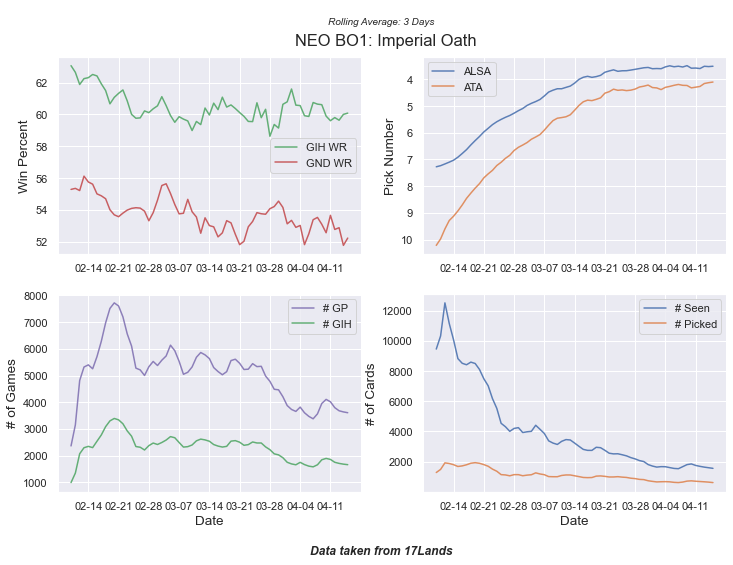

In [36]:
examiner.plot_card_summary('Imperial Oath')

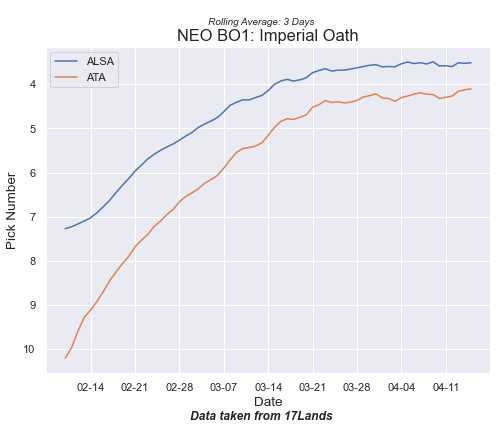

In [37]:
examiner.plot_pick_stats('Imperial Oath')

In [38]:
examiner.card_archetype_performance('Imperial Oath')

AttributeError: module 'WUBRG' has no attribute 'COLOR_PAIRS'

In [ ]:
examiner.stat_archetype_performance('GIH WR')

In [ ]:
raise Exception('Stopping Auto-Run!')

## Current Tests

In [ ]:
def gt(x, y):  #Used for function pointer shenanigans
    return x > y

def lt(x, y):  #Used for function pointer shenanigans
    return x < y

def filter_quadrant_cards_df(func1, func2, iwd_thresh=0, play_lim=0.01, card_rarity=None, deck_color=''):
    frame = set_data.BO1.card_frame(deck_color=deck_color, summary=True, card_rarity=card_rarity)
    
    # TODO: Make the mean different based on card rarity so cards aren't moved into incorrect categories.
    
    if play_lim is not None:
        if type(play_lim) is float: play_lim *= set_data.BO1.get_games_played(deck_color)
        print(f'Minimum Games played to be included: {play_lim}')
        frame = frame[frame['# GP'] >= play_lim]
        
    games_played_mean = frame['# GP'].mean()
    cards = frame[func1(frame['IWD'], iwd_thresh)]
    cards = cards[func2(cards['# GP'], games_played_mean)]
    cards = cards.sort_values('IWD', ascending=func1==lt)
    return cards


def get_trap_cards(card_rarity=None, deck_color='', iwd_thresh=0, play_lim=0.01):
    return filter_quadrant_cards_df(lt, gt, iwd_thresh, play_lim, card_rarity, deck_color)

def get_niche_cards(card_rarity=None, deck_color='', iwd_thresh=0, play_lim=0.01):
    return filter_quadrant_cards_df(gt, lt, iwd_thresh, play_lim, card_rarity, deck_color)

def get_staple_cards(card_rarity=None, deck_color='', iwd_thresh=0, play_lim=0.01):
    return filter_quadrant_cards_df(gt, gt, iwd_thresh, play_lim, card_rarity, deck_color)

def get_dreg_cards(card_rarity=None, deck_color='', iwd_thresh=0, play_lim=0.01):
    return filter_quadrant_cards_df(lt, lt, iwd_thresh, play_lim, card_rarity, deck_color)

In [ ]:
get_niche_cards(deck_color='GW', card_rarity='CU')

In [ ]:
set_data.BO1.card_archetype_performance("Era of Enlightenment")

# TODO

- Calculate archetype openess
 - GIH WR & ALSA based
 - 2.25 of a common per draft 
- Improve graphing capabilities
 - Modify Graphs so they also save an image to a cache folder.
 - Implement better graph titles and axes
 - Update functions to be more general, and have DataFrames piped into them.
- Move sets of files into subfolders based on functionality and relationship (DataFetch, Cards, Graphing, Utils, etc.)
- Better group settings and consts into one file/location.

# Data Graphing and Display

## Card Summary

In [ ]:
set_data.BO1.plot_card_summary('Imperial Oath')

In [ ]:
set_data.BO1.plot_card_summary("Befriending the Moths", roll=3)

In [ ]:
set_data.BO1.plot_card_summary("Michiko's Reign of Truth", roll=3)

In [ ]:
set_data.BO1.plot_card_summary("The Fall of Lord Konda", roll=3)

In [ ]:
set_data.BO1.plot_card_summary('Sunblade Samurai', roll=3)

In [ ]:
set_data.BO1.get_top('GIH WR', count=25, asc=False, deck_color='', card_color=None, card_rarity='RM', play_lim=0.005)

## Card Pick Order Stats

In [ ]:
set_data.BO1.plot_pick_stats('Imperial Oath')

In [ ]:
set_data.BO1.plot_pick_stats('Behold the Unspeakable', 3)

In [ ]:
to_graph = ['Imperial Oath', 'Behold the Unspeakable', 'Virus Beetle', 'Network Disruptor', 'Kumano Faces Kakkazan', 'Iron Apprentice']
for card in to_graph:
    set_data.BO1.plot_pick_stats(card, 3)

## Archetype Winrate History

In [ ]:
set_data.BO1.get_archetype_winrate_history()

In [ ]:
set_data.BO1.plot_archetype_winrate_history('')

In [ ]:
set_data.BO3.plot_archetype_winrate_history('')

## Archetype Playrate History

In [ ]:
set_data.BO1.get_archetype_playrate_history()

In [ ]:
set_data.BO1.plot_archetype_playrate_history('')

In [ ]:
set_data.BO3.plot_archetype_playrate_history('')

## Card Pick Order Changes

In [ ]:
diff = set_data.BO1.compare_card_evaluations('2022-02-10', '2022-03-27')
commons = diff[diff['Rarity'] == 'C']
uncommons = diff[diff['Rarity'] == 'U']

In [ ]:
SRT_TRG = 'Δ ATA'
commons.sort_values(SRT_TRG, ascending=False).head(20)

In [ ]:
commons.sort_values(SRT_TRG, ascending=True).head(20)

In [ ]:
uncommons.sort_values(SRT_TRG, ascending=False).head(10)

In [ ]:
uncommons.sort_values(SRT_TRG, ascending=True).head(10)